# Clip processed hdf/shapefiles to match area of interest


In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (15, 8), 'font.size': 10})

from shapely.geometry import Polygon, Point

In [3]:
# Comment if you get error as these are not required
# or you can install these as other python package
# Eg: conda install hvplot etc
import hvplot
import hvplot.pandas
import geoviews as gv

## Extract the ATL data for the matching area of interest


In [4]:
# Get the area of interest
# lake = gpd.read_file('D:/wspace/icesat2/aoi_greenland/lake.shp')
lake = gpd.read_file('gis/aoi_greenland/lake.shp')
lake.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# icesat2_path = 'D:/wspace/icesat2/lakes'
icesat2_path = f'/fs/project/howat.4/icesat2/prototyping/lakes'

files = os.listdir(f'{icesat2_path}')
outline = gpd.read_file(f'{icesat2_path}/outline.shp')

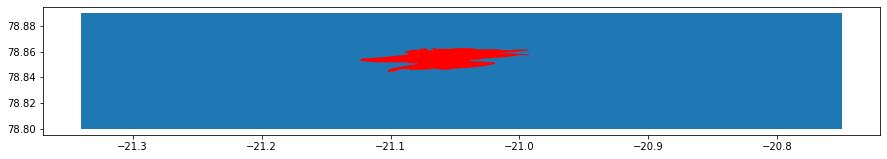

In [6]:
# outline = outline.to_crs({'init': 'epsg:4326'})
ax = outline.plot()
lake.plot(ax=ax, color='r');

In [7]:
# Previously processed ATL Shapefiles
shp_files = [f for f in files if f.endswith('.shp') and 'ATL06' in f]
len(shp_files)

22

## Clip granules intersecting the lake to make time series plots for meeting poster
We will process one lake at a time

In [8]:
clip_folder = (f'{icesat2_path}/clips')


In [9]:
from earthpy import clip as cl
# Clip the icesat2 points that fall within the lake shapefile
#Create new folder to save the clipped results
clip_folder = (f'{icesat2_path}/clips')
if not os.path.exists(clip_folder):
    os.makedirs(clip_folder)

clip_files = []
outside_files = []
for fname in shp_files:
    try:
        gdf = gpd.read_file(f'{icesat2_path}/{fname}')
        clip = cl.clip_shp(gdf, lake)
        #Save to new folder
        #clip.to_file(f'{clip_folder}/{fname}')
        clip_files.append(fname)
    except ValueError:
        # ValueError: Shape and crop extent do not overlap.
        outside_files.append(fname)
# print('These are the granules that are outside of our area of interest')
# print(outside_files)

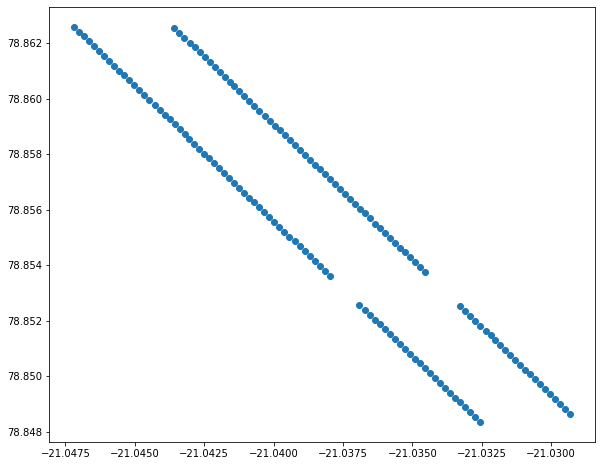

In [15]:
ax = gpd.clip(gdf, lake).plot()
lake

---
END of Clipping ATL06 to lake boundaries

# Start here for clipped shapefiles

In [17]:
# List the clipped shapefiles
shp_files = [f for f in os.listdir(f'{clip_folder}') if f.endswith('.shp')]
shp_files

['processed_ATL06_20190617175325_12290305_002_01.shp',
 'processed_ATL06_20181026153716_04280103_002_01.shp',
 'processed_ATL06_20190726023631_04280403_002_01.shp',
 'processed_ATL06_20181218023352_12290105_002_01.shp',
 'processed_ATL06_20181227124101_13730103_002_01.shp',
 'processed_ATL06_20190217233746_07870205_002_01.shp',
 'processed_ATL06_20190426065655_04280303_002_01.shp']

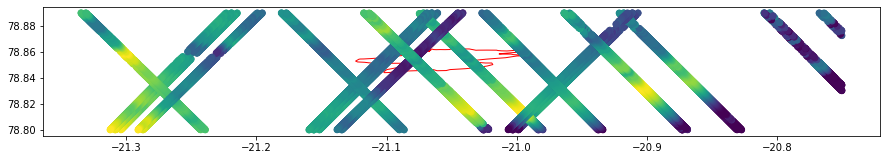

In [18]:
# Plot all the granules over lake (assuming not many)
ax = lake.plot(edgecolor='r', facecolor='w')
for shp in shp_files:
    gdf = gpd.read_file(f'{icesat2_path}/{shp}')
    gdf.plot(ax=ax, column='h_li')

In [19]:
# Plot some of the interesting/overlapping tile
gdf1 = gpd.read_file(f'{icesat2_path}/{shp_files[-1]}')
gdf2 = gpd.read_file(f'{icesat2_path}/{shp_files[-2]}')
gdf3 = gpd.read_file(f'{icesat2_path}/{shp_files[-3]}') 
gdf4 = gpd.read_file(f'{icesat2_path}/{shp_files[-4]}')

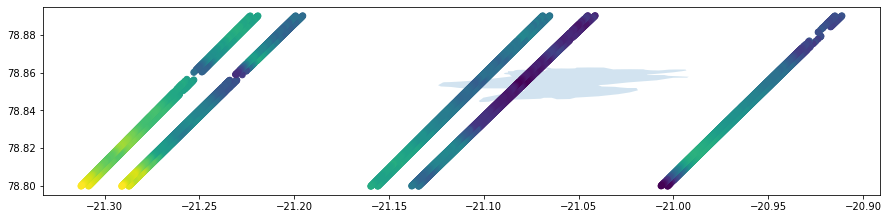

In [20]:
ax = lake.plot(alpha=.2)
# gdf1.plot(ax=ax, column='h_li', legend=False)
gdf2.plot(ax=ax, column='h_li', legend=False)
# gdf3.plot(ax=ax, column='h_li', legend=False)
gdf4.plot(ax=ax, column='h_li', legend=False)

In [21]:
# Change to native datetime format
gdf1['t_dt'] =  pd.to_datetime(gdf1.t_dt)
gdf3['t_dt'] =  pd.to_datetime(gdf3.t_dt)

In [22]:
# gdf1.h_li.hvplot() * 
gdf1[['t_dt', 'h_li', 'strip']].hvplot(x='t_dt', y='h_li', color='strip', kind='scatter')

gdf3[['t_dt', 'h_li', 'strip']].hvplot(x='t_dt', y='h_li', color='strip', kind='scatter')

:Scatter   [t_dt]   (h_li,strip)

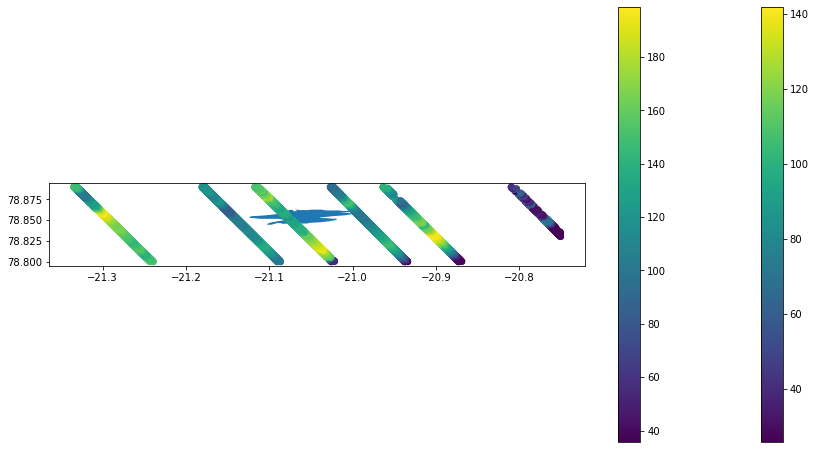

In [23]:
ax = lake.plot()
gdf1.plot(ax=ax, column='h_li', legend=True)
# gdf2.plot(ax=ax, column='h_li', legend=True)
gdf3.plot(ax=ax, column='h_li', legend=True)
# gdf4.plot(ax=ax, column='h_li', legend=True)

(501, 439)

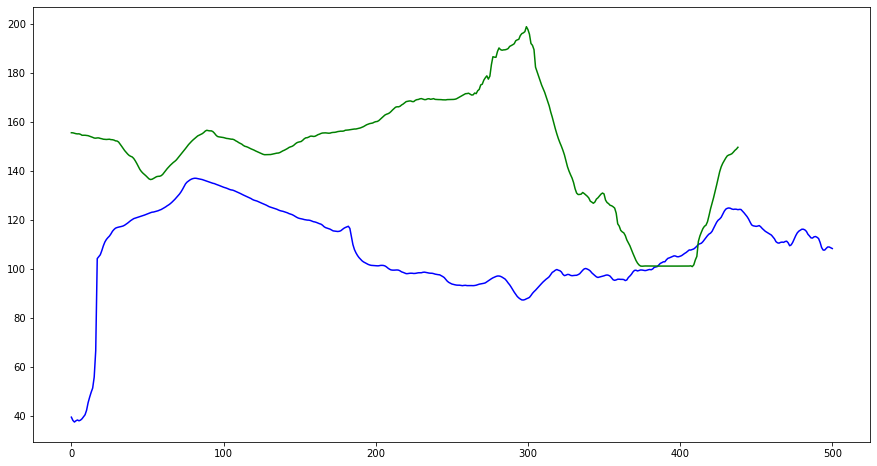

In [24]:
gdf1[gdf1.strip=='gt1l'].h_li.plot(color='b')
gdf3[gdf3.strip=='gt1l'].h_li.plot(color='g')
len(gdf1[gdf1.strip=='gt1l']), len(gdf3[gdf3.strip=='gt1l'])

(407, 462)

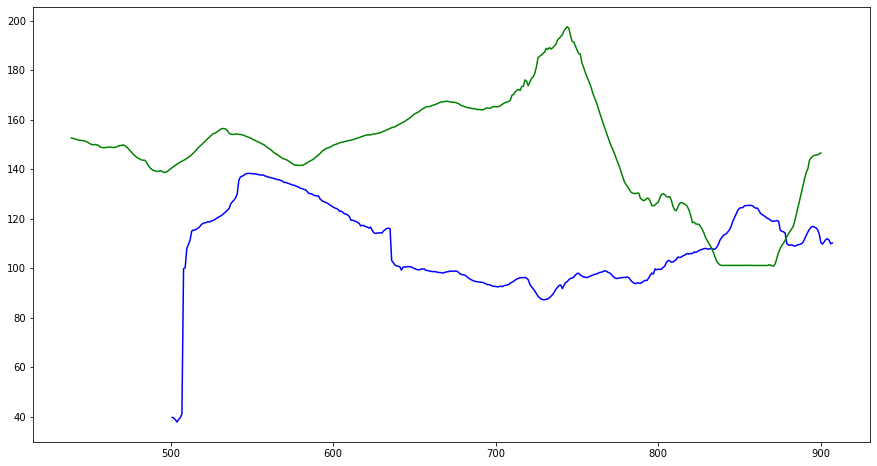

In [25]:
# Plot just one of the six ATL06 tracks
gdf1[gdf1.strip=='gt1r'].h_li.plot(color='b')
gdf3[gdf3.strip=='gt1r'].h_li.plot(color='g')
len(gdf1[gdf1.strip=='gt1r']), len(gdf3[gdf3.strip=='gt1r'])

## For 3D Plotting

In [26]:
from mpl_toolkits.mplot3d import Axes3D

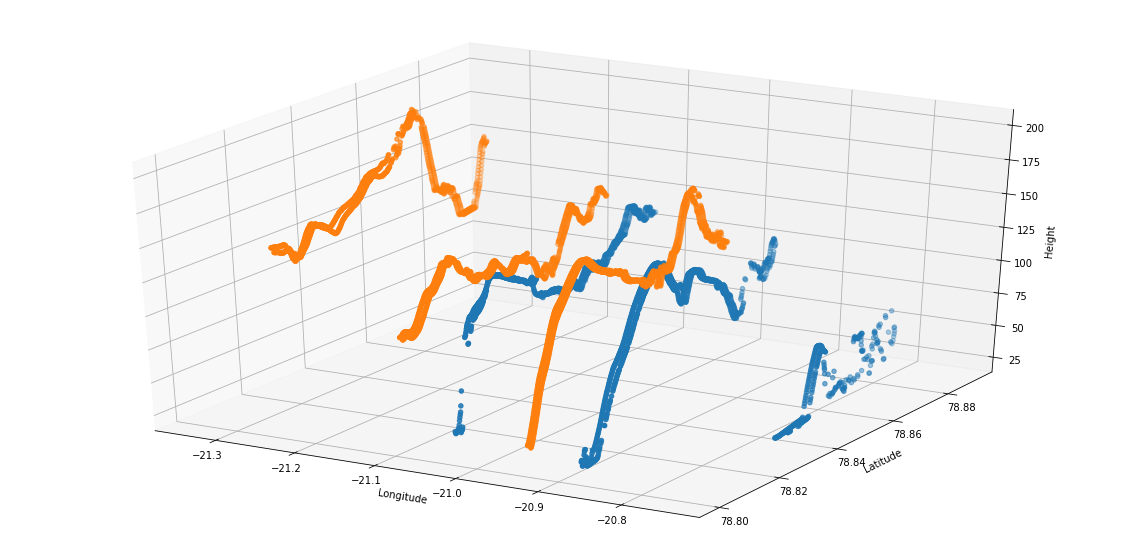

In [27]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d') # left, bottom, width, height (range 0 to 1);
ax.scatter(gdf1.geometry.x, gdf1.geometry.y, gdf1.h_li)
ax.scatter(gdf3.geometry.x, gdf3.geometry.y, gdf3.h_li) 
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height');